# How to be a DaskMaster PART-1

# Definition of Dask:
Dask is an open-source library for parallel computing, written in Python. Originally developed by bleh bleh… (You really don’t wanna know about it, do you?)

My blog will walk you through what Dask is so that you don’t waste your precious time on grasping it and wondering what the definition is.

Let’s just assume that you have the world’s best computer, with a great processor and ample RAM. Yet, you can’t run your model which uses a HUGE dataset (think numerous columns and an infinite number of rows)! You may run your whole notebook on the server, which will cost you a fortune.

This is where Dask comes in. It helps you to provide parallelism and can help you compute your data in hours or even in minutes. This saves you from spending a whole lot of money on the server (which can be put to better use for buying a Netflix subscription)

# Join The Wonderful Journey Of Using Dask On Big Datasets.
First off, we must have a better understanding of the working of Dask on a few lines of code. Boring stuff coming in 3..2..1.

In [1]:
import dask.dataframe as dd

In [3]:
from time import sleep

def inc(x):
    sleep(1)
    return x + 1
def add(x,y):
    sleep(1)
    return x+y

In [4]:
%%time
x=inc(1)
y=inc(2)
z=add(x,y)
z

CPU times: user 0 ns, sys: 2.18 ms, total: 2.18 ms
Wall time: 3 s


5

This is a basic python code, with 2 functions. One is an incrementing function and the other is an addition function. But that’s not the main point..
The main point is the execution time of this code. It will take around 2.5–3.11 seconds depending on the processing of your “LAPTOPS’.
Now we will see Dask or as I like to call it, parallel code.

# Remember to install the Dask libraries to see the below code in working!
As I am assuming you have all the libraries installed.

In [5]:
from dask import delayed

In [6]:
from dask import delayed
x=delayed(inc)(1)
y=delayed(inc)(2)
z=delayed(add)(x,y) #now here z is a "thunk" object

In [7]:
z

Delayed('add-dd0058cd-7d2f-4dad-8fed-02e0f8d6c2a7')

# What is delayed?? What is “Thunk”??Why I am getting that output??
* The Dask delayed function decorates your functions so that they operate lazily. Rather than executing your function immediately, it will defer execution.
* ‘Thunk’ is a keyword which we use in reference to lazy execution. Basically, Dask does ‘lazy’ computing.
* When you are making a delayed (inc), the output will not be printed but will execute partially.
* Instead of executing x and y sequentially, both get executed simultaneously, upon calling Compute( ).
* This evidently saves time. When you execute the code z.Compute(), then the output gets printed.

In [8]:
%%time
z.compute()

CPU times: user 10.6 ms, sys: 3.69 ms, total: 14.3 ms
Wall time: 2.03 s


5

1. So Dask basically executes the x and y simultaneously or I say parallelly. and that will save you time. The running time would be less than the previous time of the python code.
2. BUT the time difference is 0 if you remove the Sleep function.
3. Keep in your head that the above code is just to explain the working and to show you how dask actually works. The time difference will get significant when dealing with HUGE datasets.
4. Now time for some visual action you can see in dask and understand correctly that what the deal is!!?.
for that, we first have to create a Client that will redirect us to the Task Graph window. Task Graph is a status bar where you can see the backend of the dask functionalities and you can see other things too.

In [9]:
from dask.distributed import Client, progress
client = Client(n_workers=2, threads_per_worker=2, memory_limit='1GB')
client

Client Scheduler: tcp://127.0.0.1:36091 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 2 Cores: 4 Memory: 2.00 GB


This code will help you to generate a link to the Task graph. By clicking on this link, you can see how Dask is working.

Let’s get into more detail and try to understand the following code.
for loop with the inc function — we are generating a list, and then getting ‘total’ with the help of sum function integration.
Now is the time for the parallel code! But before running the code below, try to open the Task Window to see both tabs in front of you. Use: ‘Window + Left Arrow Key’.

In [10]:
data=[1,2,3,4,5,6,7,8]
results = []
for x in data:
    y = inc(x)
    results.append(y)
    
total = sum(results)
print(total)

44


for loop with the delayed inc function. Then, computing the ‘total’
After running this code, let’s see the Task Graph. Some movement is evident in the Task Graph.

In [11]:

results = []

for x in data:
    y = delayed(inc)(x)
    results.append(y)
    
total = delayed(sum)(results)
print("Before computing:", total)  # Let's see what type of thing total is
result = total.compute()
print("After computing :", result)

Before computing: Delayed('sum-5f20a8e7-a1d3-4a89-b9a8-5212363b747a')
After computing : 44


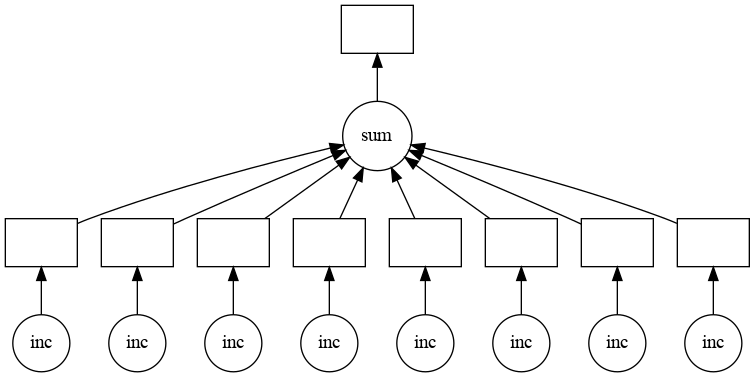

In [14]:
import graphviz
total.visualize()
###if this generates error then first execute "pip install graphviz"####

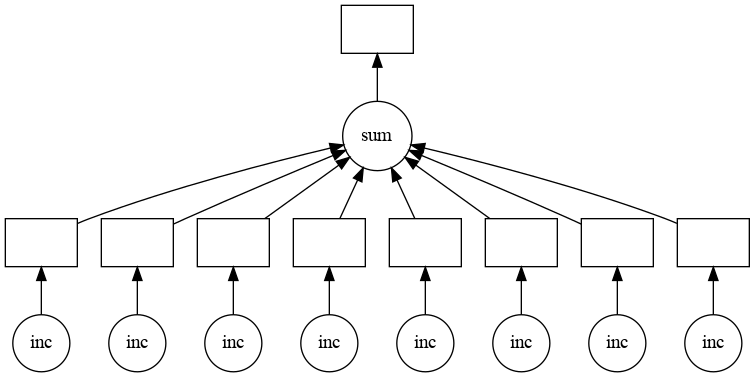

In [15]:
total.visualize()

In [16]:
client.close()